In [40]:
#126015039
#PCA ANALYSIS 

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import make_swiss_roll

In [41]:
dataframe = pd.read_csv(r"C:\Users\sastra\Downloads\126015039\Pizza.csv")
n = np.shape(dataframe)[0]
p = np.shape(dataframe)[1]
print("SHAPE OF DATASET: {} \n  Number of samples:\t{}\n  Number of features:\t{}"
      .format(np.shape(dataframe), n, p))

SHAPE OF DATASET: (300, 9) 
  Number of samples:	300
  Number of features:	9


In [42]:
print(dataframe.describe(include='all'))

       brand            id        mois        prot         fat         ash  \
count    300    300.000000  300.000000  300.000000  300.000000  300.000000   
unique    10           NaN         NaN         NaN         NaN         NaN   
top        H           NaN         NaN         NaN         NaN         NaN   
freq      33           NaN         NaN         NaN         NaN         NaN   
mean     NaN  20841.040000   40.903067   13.373567   20.229533    2.633233   
std      NaN   6962.917222    9.552987    6.434392    8.975658    1.269724   
min      NaN  14003.000000   25.000000    6.980000    4.380000    1.170000   
25%      NaN  14093.750000   30.902500    8.060000   14.770000    1.450000   
50%      NaN  24020.500000   43.300000   10.440000   17.135000    2.225000   
75%      NaN  24110.250000   49.115000   20.022500   21.435000    3.592500   
max      NaN  34045.000000   57.220000   28.480000   47.200000    5.430000   

            sodium        carb         cal  
count   300.000000

In [43]:
print(dataframe.drop(['brand','id'], axis=1).skew(axis=0))

mois     -0.040579
prot      0.865951
fat       1.562153
ash       0.679435
sodium    1.819191
carb      0.053110
cal       1.074278
dtype: float64


In [44]:
print("\n",dataframe.drop(['brand','id'], axis=1).kurtosis(axis=0))


 mois     -1.532346
prot     -0.752779
fat       1.905157
ash      -0.877479
sodium    2.264146
carb     -1.671596
cal       1.188494
dtype: float64


In [45]:
X, t = make_swiss_roll(noise=0.05, random_state=0)
X.shape
t.shape

(100,)

In [46]:
X = dataframe.drop(['brand', 'id'], axis=1).values

In [47]:
Xc = X - np.mean(X, axis=0)

In [48]:
Cov_Xc = np.cov(Xc.T)
print("This is the Covariance Matrix C of the Transpose Centered Dataset:\n\n{}"
      .format(np.array_str(Cov_Xc)))

This is the Covariance Matrix C of the Transpose Centered Dataset:

[[  91.25955377   22.14358334  -14.68956779    3.22109607   -0.36186504 -101.93055413   -4.52791813]
 [  22.14358334   41.40140496   28.76104414    6.7307202     1.02262723  -99.01970034    0.28029776]
 [ -14.68956779   28.76104414   80.56244192    9.02193931    3.10256393 -103.60886432    4.25498074]
 [   3.22109607    6.7307202     9.02193931    1.61219787    0.38002101  -20.58032784    0.2570195 ]
 [  -0.36186504    1.02262723    3.10256393    0.38002101    0.13716486   -4.14119479    0.15430462]
 [-101.93055413  -99.01970034 -103.60886432  -20.58032784   -4.14119479  325.07089192   -0.26253522]
 [  -4.52791813    0.28029776    4.25498074    0.2570195     0.15430462   -0.26253522    0.38444247]]


In [49]:
Corr_Xc = np.corrcoef(Xc.T)
print("This is the Correlation Matrix R of the Transpose Centered Dataset:\n\n{}"
      .format(np.array_str(Corr_Xc)))

This is the Correlation Matrix R of the Transpose Centered Dataset:

[[ 1.          0.36024768 -0.17131821  0.26555552 -0.1022789  -0.59180165 -0.76444054]
 [ 0.36024768  1.          0.49800167  0.8238437   0.42912952 -0.85354226  0.0702581 ]
 [-0.17131821  0.49800167  1.          0.79163396  0.93332522 -0.64023817  0.7645671 ]
 [ 0.26555552  0.8238437   0.79163396  1.          0.80812215 -0.89898837  0.32646845]
 [-0.1022789   0.42912952  0.93332522  0.80812215  1.         -0.62017634  0.6719575 ]
 [-0.59180165 -0.85354226 -0.64023817 -0.89898837 -0.62017634  1.         -0.02348458]
 [-0.76444054  0.0702581   0.7645671   0.32646845  0.6719575  -0.02348458  1.        ]]


 eigenvalues and eigenvectors of both matrices.

In [50]:
eigenvalues_covariance, eigenvectors_covariance = np.linalg.eig(Cov_Xc)
print("These are the eigenvalues of Covariance Matrix C:\n{}\n".format(np.array_str(eigenvalues_covariance)))
print("These are the eigenvectors of the Covariance Matrix C:\n{}".format(np.array_str(eigenvectors_covariance)))

These are the eigenvalues of Covariance Matrix C:
[421.58854013 101.82022418  16.82525242   0.18442633   0.00837373   0.00103717   0.00024383]

These are the eigenvectors of the Covariance Matrix C:
[[ 0.27696343  0.74707368 -0.35201618 -0.1958998   0.05947474  0.4409739   0.06989157]
 [ 0.26694146 -0.05573295  0.80971797 -0.25574709  0.08371924  0.4434898   0.02990365]
 [ 0.27893356 -0.65784531 -0.46797644 -0.25980215  0.03577564  0.4486243  -0.0198207 ]
 [ 0.0554341  -0.04060421  0.02222528  0.87144324 -0.16663351  0.45022025  0.07004339]
 [ 0.01114161 -0.02381376 -0.02624469  0.20145265  0.97831601 -0.03046345  0.00256524]
 [-0.87808436  0.00681755 -0.01246929 -0.16452461  0.05746968  0.4444054   0.02997697]
 [ 0.00060329 -0.06125383 -0.01006227 -0.04067807  0.00149699 -0.0804525   0.99399034]]


In [51]:
eigenvalues_correlation, eigenvectors_correlation = np.linalg.eig(Corr_Xc)
print("These are the eigenvalues of Correlation Matrix R:\n{}\n".format(np.array_str(eigenvalues_correlation)))
print("These are the eigenvectors of the Correlation Matrix R:\n{}".format(np.array_str(eigenvectors_correlation)))

These are the eigenvalues of Correlation Matrix R:
[4.1717819  2.29045739 0.41456234 0.09517423 0.02767702 0.00033761 0.00000952]

These are the eigenvectors of the Correlation Matrix R:
[[ 0.06470937  0.62827587 -0.42166894 -0.22072158  0.00647029 -0.4464499  -0.41856904]
 [ 0.3787609   0.26970665  0.74602744 -0.0105932   0.38798279  0.00017152 -0.27676464]
 [ 0.44666592 -0.23437908 -0.19930871 -0.50704216 -0.17336763  0.52540287 -0.37767153]
 [ 0.47188953  0.11099042  0.05627269  0.55239855 -0.6708857  -0.05886093 -0.0560214 ]
 [ 0.43570289 -0.20166165 -0.45516887  0.44627689  0.60261408 -0.00313099  0.00052432]
 [-0.42491371 -0.32031208  0.05223651  0.33433948 -0.0074369   0.00050885 -0.77606791]
 [ 0.2444873  -0.56745756  0.11331559 -0.27926315 -0.07800317 -0.72191385 -0.01205981]]


Now it can be computed the matrix $Y$ (hence, the principal components), and it can be defined also a semantic for 
the new features (PC's) through by the study of correlations among original features $X_{i}$ and 
principal components $Y_{j}$.

In [54]:
YC = Xc.dot(eigenvectors_covariance)
print("This is the dimension of the Y matrix \t {}\n\t(*) using the loadings of the covariance matrix C\n"
      "\t() It must be equal to the dimension of the original dataset\n".format(np.shape(YC)))

This is the dimension of the Y matrix 	 (300, 7)
	(*) using the loadings of the covariance matrix C
	() It must be equal to the dimension of the original dataset



In [53]:
YR = Xc.dot(eigenvectors_correlation)
print("This is the dimension of the Y matrix \t {}\n\t() using the loadings of the correlation matrix R\n"
      "\t() It must be equal to the dimension of the original dataset".format(np.shape(YR)))

This is the dimension of the Y matrix 	 (300, 7)
	() using the loadings of the correlation matrix R
	() It must be equal to the dimension of the original dataset


This is the explained variance of each feature (covariance):
	[78.01 18.84  3.11  0.03  0.    0.    0.  ]
This is the cumulative variance (covariance):
	[ 78.01  96.85  99.96 100.   100.   100.   100.  ]


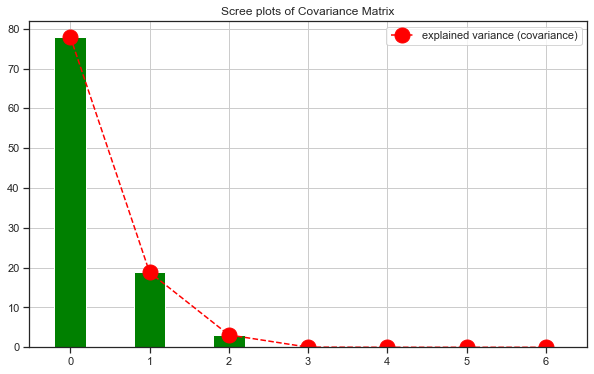

In [46]:
total_variation_covariance = np.sum(eigenvalues_covariance)
explained_variance_covariance = np.asarray(
    [100*(i/total_variation_covariance) for i in sorted(eigenvalues_covariance, reverse=True)])
print("This is the explained variance of each feature (covariance):\n\t{}"
      .format(np.array_str(explained_variance_covariance, precision=2)))
cumulative_covariance = np.cumsum(explained_variance_covariance)
print("This is the cumulative variance (covariance):\n\t{}"
      .format(np.array_str(cumulative_covariance, precision=2)))

fig1 = plt.figure(1, figsize=(10,6))
plt.title("Scree plots of Covariance Matrix")
plt.bar(x=np.arange(np.shape(explained_variance_covariance)[0]), 
        height=explained_variance_covariance, 
        width=0.4, color="green")
plt.plot(np.arange(np.shape(explained_variance_covariance)[0]), 
         explained_variance_covariance, 
         linestyle="--", marker="o", markersize=15,
         color="red", label="explained variance (covariance)")
plt.savefig("images/screeplot_covariance_pizza.png")
plt.legend()
plt.grid()
plt.show()

This is the explained variance of each feature (correlation):
	[59.6  32.72  5.92  1.36  0.4   0.    0.  ]
This is the cumulative variance (correlation):
	[ 59.6   92.32  98.24  99.6  100.   100.   100.  ]


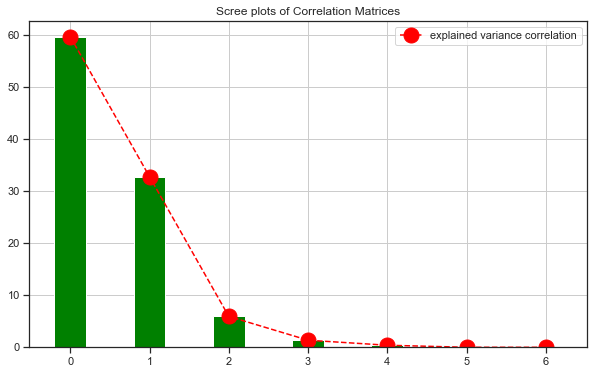

In [47]:
total_variation_correlation = np.sum(eigenvalues_correlation)
explained_variance_correlation = np.asarray(
    [100*(i/total_variation_correlation) for i in sorted(eigenvalues_correlation, reverse=True)])
print("This is the explained variance of each feature (correlation):\n\t{}"
      .format(np.array_str(explained_variance_correlation, precision=2)))
cumulative_correlation = np.cumsum(explained_variance_correlation)
print("This is the cumulative variance (correlation):\n\t{}"
      .format(np.array_str(cumulative_correlation, precision=2)))

fig2 = plt.figure(2, figsize=(10,6))
plt.title("Scree plots of Correlation Matrices")
plt.bar(x=np.arange(np.shape(explained_variance_correlation)[0]), 
        height=explained_variance_correlation, 
        width=0.4, color="green")
plt.plot(np.arange(np.shape(explained_variance_correlation)[0]), 
         explained_variance_correlation, 
         linestyle="--", marker="o", markersize=15,
         color="red", label="explained variance correlation")
plt.savefig("images/screeplot_correlation_pizza.png")
plt.legend()
plt.grid()
plt.show()

In [48]:
number_k = 2

### Correlation circle (Original features and PC's of the covariance matrix C)

In [49]:
CC_Covariance = []
for i in range(np.shape(X)[1]):
    f = []
    for j in range(np.shape(YC)[1]):
        c = (np.corrcoef(X[:,i], YC[:,j])[0])[1]
        f.append(c)
    CC_Covariance.append(f)

In [50]:
CorrelationCircle_Covariance = np.asarray(CC_Covariance)

In [51]:
print("This is the full Correlation Matrix (based on C):\n{}"
      .format(CorrelationCircle_Covariance))

This is the full Correlation Matrix (based on C):
[[ 0.59528872  0.7891168  -0.15114864 -0.00880656  0.00056971  0.00148661  0.00011424]
 [ 0.85182991 -0.08740203  0.51618696 -0.01706926  0.00119063  0.00221973  0.00007257]
 [ 0.63808547 -0.73956184 -0.21386439 -0.01243048  0.00036474  0.00160968 -0.00003448]
 [ 0.89642136 -0.32268511  0.07179908  0.29474157 -0.01200916  0.01141931  0.0008614 ]
 [ 0.61769026 -0.64881903 -0.29067039  0.23359472  0.2417226  -0.002649    0.00010816]
 [-0.99998066  0.00381554 -0.00283683 -0.0039188   0.00029168  0.00079381  0.00002596]
 [ 0.01997805 -0.99686093 -0.06656733 -0.0281745   0.00022093 -0.00417877  0.02503292]]


In [52]:
print("This is the Correlation Matrix with {} PC's (based on C):\n{}"
      .format(number_k, CorrelationCircle_Covariance[:,0:number_k]))

This is the Correlation Matrix with 2 PC's (based on C):
[[ 0.59528872  0.7891168 ]
 [ 0.85182991 -0.08740203]
 [ 0.63808547 -0.73956184]
 [ 0.89642136 -0.32268511]
 [ 0.61769026 -0.64881903]
 [-0.99998066  0.00381554]
 [ 0.01997805 -0.99686093]]


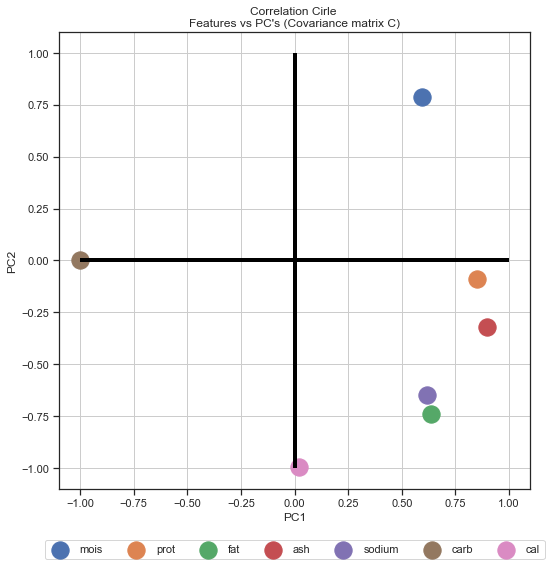

In [53]:
fig3 = plt.figure(figsize=(8,8))
plt.title("Correlation Cirle \nFeatures vs PC's (Covariance matrix C)")
plt.hlines(y=0, xmin=-1, xmax=1, colors='black', linewidth=4, linestyle='solid')
plt.vlines(x=0, ymin=-1, ymax=1, colors='black', linewidth=4, linestyle='solid')
for i in range(0,np.shape(X)[1]):
    plt.scatter(CorrelationCircle_Covariance[i:i+1,0:1], 
                CorrelationCircle_Covariance[i:i+1,1:2], s=300, label=dataframe.columns[i+2])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           fancybox=True, ncol=np.shape(X)[1])
plt.grid()
plt.tight_layout()
plt.savefig("images/circle_correlation_covariance_pizza.png")
plt.show()

### Correlation circle (Original features and PC's of the correlation matrix R)

In [54]:
CC_Correlation = []
for i in range(np.shape(X)[1]):
    f = []
    for j in range(np.shape(YR)[1]):
        c = (np.corrcoef(X[:,i], YR[:,j])[0])[1]
        f.append(c)
    CC_Correlation.append(f)

In [55]:
CorrelationCircle_Correlation = np.asarray(CC_Correlation)

In [56]:
print("This is the full Correlation Matrix (based on R):\n{}"
      .format(CorrelationCircle_Correlation))

This is the full Correlation Matrix (based on R):
[[ 0.39254883  0.9277906  -0.61128471 -0.47462053  0.54242169 -0.74270638  0.53275614]
 [ 0.86033461  0.67845797  0.39186623 -0.78119537  0.61860202  0.1111724   0.88299394]
 [ 0.78677389  0.10408943  0.15278237 -0.77125258 -0.36687145  0.78694778  0.67161305]
 [ 0.95120597  0.56395434  0.138157   -0.91033123  0.13597657  0.37038233  0.92331553]
 [ 0.74732984  0.1343122   0.03680121 -0.73815484 -0.39723227  0.69813968  0.64520726]
 [-0.97344123 -0.82516403  0.09821867  0.97807271 -0.33520239 -0.06381776 -0.99656751]
 [ 0.24850867 -0.54485528  0.47787623 -0.18979956 -0.61173046  0.99845317  0.08075095]]


In [57]:
print("This is the Correlation Matrix with {} PC's (based on R):\n{}"
      .format(number_k, CorrelationCircle_Correlation[:,0:number_k]))

This is the Correlation Matrix with 2 PC's (based on R):
[[ 0.39254883  0.9277906 ]
 [ 0.86033461  0.67845797]
 [ 0.78677389  0.10408943]
 [ 0.95120597  0.56395434]
 [ 0.74732984  0.1343122 ]
 [-0.97344123 -0.82516403]
 [ 0.24850867 -0.54485528]]


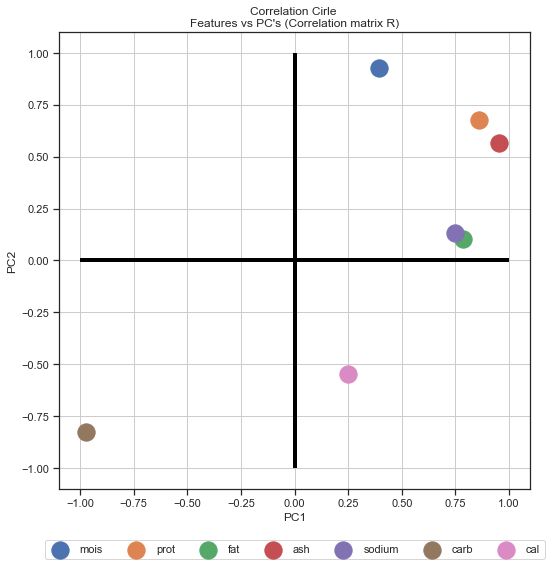

In [58]:
fig4 = plt.figure(figsize=(8,8))
plt.title("Correlation Cirle \nFeatures vs PC's (Correlation matrix R)")
plt.hlines(y=0, xmin=-1, xmax=1, colors='black', linewidth=4, linestyle='solid')
plt.vlines(x=0, ymin=-1, ymax=1, colors='black', linewidth=4, linestyle='solid')
for i in range(0,np.shape(X)[1]):
    plt.scatter(CorrelationCircle_Correlation[i:i+1,0:1], 
                CorrelationCircle_Correlation[i:i+1,1:2], 
                s=300, label=dataframe.columns[i+2])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           fancybox=True,ncol=np.shape(X)[1])
plt.grid()
plt.tight_layout()
plt.savefig("images/circle_correlation_correlation_pizza.png")
plt.show()

In [ ]:
sns.set(style="ticks", color_codes=True)
scatter = sns.pairplot(data=dataframe.drop(['id'], axis=1), markers='o')
scatter.savefig("images/scatter_pizza.png")

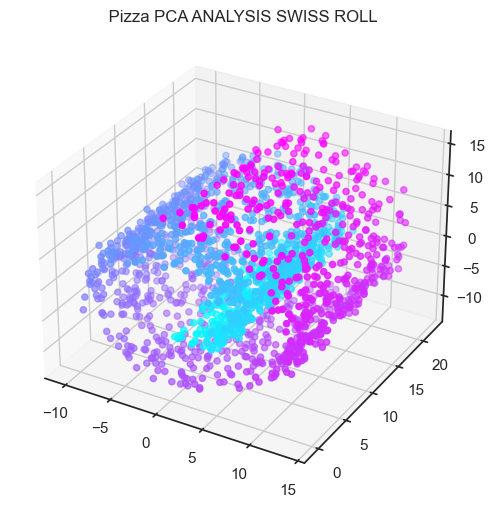

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA

# Generate the data
X, y = make_swiss_roll(n_samples=2000,noise=0.5)


# Fit the model with LLE
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10)
X_lle = lle.fit_transform(X)
reconstruction_error_lle = lle.reconstruction_error_


# Fit the model with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
reconstruction_error_pca = 1 - sum(pca.explained_variance_ratio_)

# Plot the original data
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2],
           c=y, cmap=plt.cm.cool)
plt.title(' Pizza PCA ANALYSIS SWISS ROLL')
plt.show()
